# <font color='maroon'>Assessment</font>
Given the following dataset, answer the questions that follow. The necessary libraries have been imported.


In [1]:
import matplotlib.pyplot as plt
import numpy
from numpy import arange
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import random as rnd

In [25]:
%matplotlib inline

In [26]:
#pip freeze > requirement.txt

In [27]:
data = pd.read_csv('athletes_.csv', sep=',')

### Question 1
Study the data. What is the size of the dataset?

In [28]:
#Return an int representing the number of elements in this object.
data.size

11844168

#### Question 1.1
Generate summary statistics of the data.

In [29]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
data.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


#### Question 1.2
Are the any missing values?  A simple strategy would be to remove rows with missing values. This can however reduce the size of the dataset. Another technique is to imput missing values with a sensible value like the mean.

For more on how to deal with missing values, see this blog entry: [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/).

In [30]:
#Shows rows
data.index

RangeIndex(start=0, stop=423006, step=1)

In [31]:
#Returns index
data.columns

Index(['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age',
       'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad',
       'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups',
       'eat', 'train', 'background', 'experience', 'schedule', 'howlong',
       'retrieved_datetime'],
      dtype='object')

In [32]:
#print number of rows and columns
data.shape

(423006, 28)

In [33]:
#Mark all of the values in the subset that have zero values as True then count the number of true values in each column.
print((data[['athlete_id','name', 'region', 'team', 'affiliate', 'gender','age','height','weight','fran','helen','grace','filthy50','fgonebad','run400','run5k','candj','snatch','deadlift','backsq','pullups', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong', 'retrieved_datetime']] == 0).sum())

athlete_id               0
name                     0
region                   0
team                     0
affiliate                0
gender                   0
age                      0
height                  21
weight                   0
fran                     0
helen                    0
grace                    0
filthy50                 0
fgonebad              3033
run400                   0
run5k                    0
candj                 3383
snatch                3312
deadlift              3685
backsq                3507
pullups               3382
eat                      0
train                    0
background               0
experience               0
schedule                 0
howlong                  0
retrieved_datetime       0
dtype: int64


In [34]:
# mark zero values as missing or NaN
data[['athlete_id','name', 'region', 'team', 'affiliate', 'gender','age','height','weight','fran','helen','grace','filthy50','fgonebad','run400','run5k','candj','snatch','deadlift','backsq','pullups', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong', 'retrieved_datetime']] = data[['athlete_id','name', 'region', 'team', 'affiliate', 'gender','age','height','weight','fran','helen','grace','filthy50','fgonebad','run400','run5k','candj','snatch','deadlift','backsq','pullups', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong', 'retrieved_datetime']].replace(0, numpy.NaN)
# count the number of NaN values in each column
print(data.isnull().sum())

athlete_id                 3
name                   91896
region                171744
team                  267846
affiliate             181090
gender                 91896
age                    91896
height                263158
weight                193116
fran                  367580
helen                 392727
grace                 382261
filthy50              403647
fgonebad              396301
run400                400760
run5k                 386909
candj                 321954
snatch                329038
deadlift              311368
backsq                315996
pullups               375780
eat                   329074
train                 317175
background            324061
experience            318070
schedule              325131
howlong               313800
retrieved_datetime    114061
dtype: int64


In [36]:
# mark zero values as missing or NaN
#data[['athlete_id','age','height','weight','fran','helen','grace','filthy50','fgonebad','run400','run5k','candj','snatch','deadlift','backsq','pullups']] = data[['athlete_id','age','height','weight','fran','helen','grace','filthy50','fgonebad','run400','run5k','candj','snatch','deadlift','backsq','pullups']].replace(0, numpy.NaN)
# fill missing values with mean column values
data.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column
print(data.isnull().sum())

athlete_id                 0
name                   91896
region                171744
team                  267846
affiliate             181090
gender                 91896
age                        0
height                     0
weight                     0
fran                       0
helen                      0
grace                      0
filthy50                   0
fgonebad                   0
run400                     0
run5k                      0
candj                      0
snatch                     0
deadlift                   0
backsq                     0
pullups                    0
eat                   329074
train                 317175
background            324061
experience            318070
schedule              325131
howlong               313800
retrieved_datetime    114061
dtype: int64


### Question 2

Study the `height` column. What distribution does the data follow? 
Hint: Use a histogram or density plot to visualise the data.

In [35]:
data['height']

0         70.0
1         70.0
2          NaN
3         67.0
4         65.0
          ... 
423001     NaN
423002     NaN
423003     NaN
423004    64.0
423005     NaN
Name: height, Length: 423006, dtype: float64

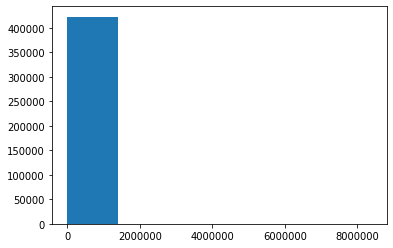

In [37]:
dataH = data['height']
plt.hist(dataH, bins=6)
plt.show()

### Question 3
What is the average height?

### Question 4

Use simple random sampling to sample from the dataset. Choose a sample of 20000.

### Question 4

Use stratified sampling to sample from the dataset. Choose a sample of 20000.

In [12]:
# your answers

### Question 5
Compare simple random sampling and stratified random sampling. Compare the means generated by the two sampling techniques and discuss your observations below your code.

### Question 6 

In  this question we are going to implement cluster sampling. Data is divided into clusters, if it isn't already divided into clusters, and then we use simple random sampling to select a number of clusters from the sample. From the group of selected clusters, we again use simple random sampling to select random data points. These now form our sample.  

Let's implement this procedure using some randomly generated data that we are going to group into clusters.

In [13]:
n_clusters = 10
data = stats.norm.rvs(loc=0,        # mean 0
                      scale=1,      # variance 1
                      size=100000,  # number of points
                      random_state=None)

data = pd.DataFrame({'var1': data})  # turn list into dataframe with heading var1

cluster = [rnd.randint(0,9) for c in range(100000)] # generate cluster numbers for grouping

n_col = pd.Series(cluster) # turn list into Series object
data['cluster'] = n_col.values
data.head()

,var1,cluster
0,-0.855882,9
1,1.027045,4
2,-0.520909,2
3,-0.590145,0
4,1.121962,5


Now that we've generated random data and placed the data into clusters, generate a sample from the *athletes* data using cluster sampling technique.

In [14]:
# your answers

<!-- Distribution fitting with scipy exercise given a dataset. Good references about El Nino dataset. I should find a climate dataset.

https://stackoverflow.com/questions/6615489/fitting-distributions-goodness-of-fit-p-value-is-it-possible-to-do-this-with/16651524#16651524

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python -->